## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [30]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [31]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [32]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [33]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [34]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [35]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [36]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [37]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [38]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [39]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [40]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [42]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [43]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\thmalli\AppData\Local\Temp\ipykernel_2052\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 152s 2s/step - loss: 3.3646 - accuracy: 0.4162 - val_loss: 2.6382 - val_accuracy: 0.4444
Epoch 2/20
61/61 [==============================] - 162s 3s/step - loss: 1.0340 - accuracy: 0.5818 - val_loss: 0.9512 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 140s 2s/step - loss: 1.0107 - accuracy: 0.5987 - val_loss: 1.1300 - val_accuracy: 0.7222
Epoch 4/20
61/61 [==============================] - 133s 2s/step - loss: 0.9813 - accuracy: 0.6084 - val_loss: 0.9285 - val_accuracy: 0.5000
Epoch 5/20
61/61 [==============================] - 151s 2s/step - loss: 0.8722 - accuracy: 0.6463 - val_loss: 1.0156 - val_accuracy: 0.7778
Epoch 6/20
61/61 [==============================] - 137s 2s/step - loss: 0.8134 - accuracy: 0.6622 - val_loss: 0.7368 - val_accuracy: 0.6111
Epoch 7/20
61/61 [==============================] - 132s 2s/step - loss: 0.8091 - accuracy: 0.6817 - val_loss: 0.5859 - val_accuracy: 0.7778
Epoch 8/20
61

In [44]:
import matplotlib.pyplot as plt

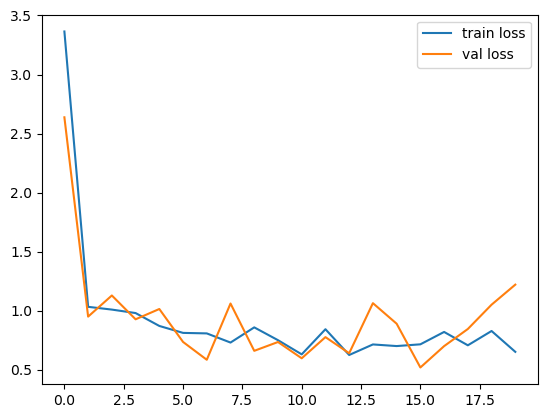

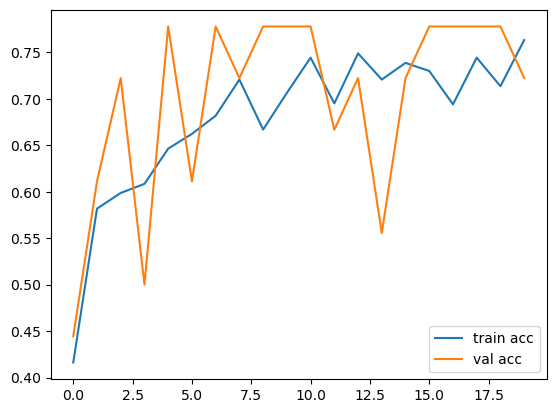

<Figure size 640x480 with 0 Axes>

In [45]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\Users\thmalli\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:

y_pred = model.predict(test_set)


1/1 [==============================] - 8s 8s/step


In [48]:
y_pred

array([[7.5245271e-06, 8.2841629e-01, 3.4606371e-02, 1.3696983e-01],
       [4.2723799e-03, 8.0396503e-01, 3.4165628e-02, 1.5759699e-01],
       [3.3125891e-06, 9.3999761e-01, 2.7085345e-02, 3.2913782e-02],
       [1.8941633e-04, 6.6821820e-01, 2.9372789e-02, 3.0221960e-01],
       [4.6780760e-06, 9.7222926e-07, 9.9999273e-01, 1.6792352e-06],
       [1.6784421e-04, 6.0941231e-01, 3.3166054e-01, 5.8759253e-02],
       [2.9989687e-06, 8.6982451e-02, 7.3311804e-03, 9.0568328e-01],
       [9.9058543e-06, 1.1536451e-03, 9.9393302e-01, 4.9033072e-03],
       [1.8260851e-05, 7.4075349e-04, 9.9886310e-01, 3.7789633e-04],
       [1.7811011e-01, 3.6262264e-04, 1.8199234e-01, 6.3953501e-01],
       [5.7038733e-06, 2.2293374e-01, 4.0015738e-02, 7.3704481e-01],
       [8.6253147e-09, 6.2295493e-07, 9.9959284e-01, 4.0656960e-04],
       [1.2030805e-05, 1.5697228e-02, 5.4355599e-02, 9.2993510e-01],
       [1.5425716e-05, 1.5343833e-01, 6.2602475e-02, 7.8394383e-01],
       [2.8036864e-06, 9.8959738e-

In [49]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [50]:
y_pred

array([1, 1, 1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 3, 1, 3, 1, 2], dtype=int64)

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [52]:
model=load_model('model_resnet50.h5')